00. Loading Data

In [1]:
import pandas as pd

df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = 'latin1', header=None)

df.columns = ['target','id', 'date','flag','user','text']


df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


01. EDA

Task 1: EDA

Question:
"How would you approach importing and exploring a dataset containing Twitter text data for sentiment analysis?"

Answer:
Load the raw Sentiment140 dataset, assign column names, retain only the text and sentiment columns, check for nulls, map sentiment labels (0 = negative, 4 = positive), and visualize distribution.


In [2]:
shape_dataset = df.shape
print("Shape of Dataset:", shape_dataset)

Shape of Dataset: (1600000, 6)


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


Dropping unnecessary columns and keeping only 'text' and 'target' for sentiment analysis.


In [4]:
df = df[['text', 'target']]
df.head()


,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [5]:
df.target.value_counts()


target
0    800000
4    800000
Name: count, dtype: int64

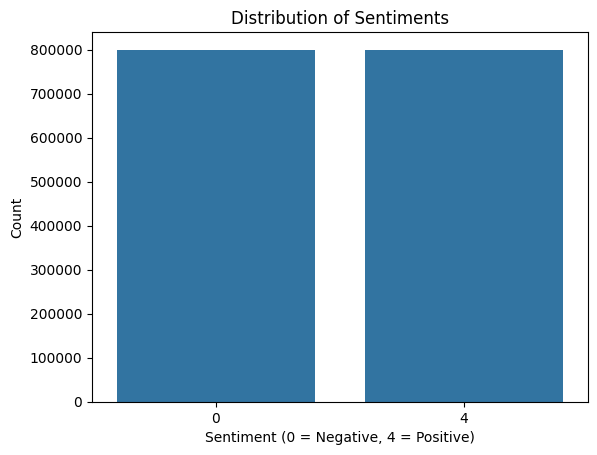

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target', data=df)
plt.title("Distribution of Sentiments")
plt.xlabel("Sentiment (0 = Negative, 4 = Positive)")
plt.ylabel("Count")
plt.show()


Mapping numeric sentiment values to categorical labels and dropping original 'target' column.


In [7]:
df['sentiment'] = df['target'].map({0:'negative', 4:'positive'})
df = df.drop(columns=['target'])

df.head()

,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative
1,is upset that he can't update his Facebook by ...,negative
2,@Kenichan I dived many times for the ball. Man...,negative
3,my whole body feels itchy and like its on fire,negative
4,"@nationwideclass no, it's not behaving at all....",negative


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1600000 non-null  object
 1   sentiment  1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB


In [8]:
df['text'].duplicated().sum()


np.int64(18534)

Dropping duplicate tweets based on the 'text' column.


In [9]:
df.drop_duplicates(subset='text', keep='first', inplace=True)


In [10]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

Dropping rows with null values (if any).


In [11]:
df.dropna(inplace=True)
df.shape

(1581466, 2)

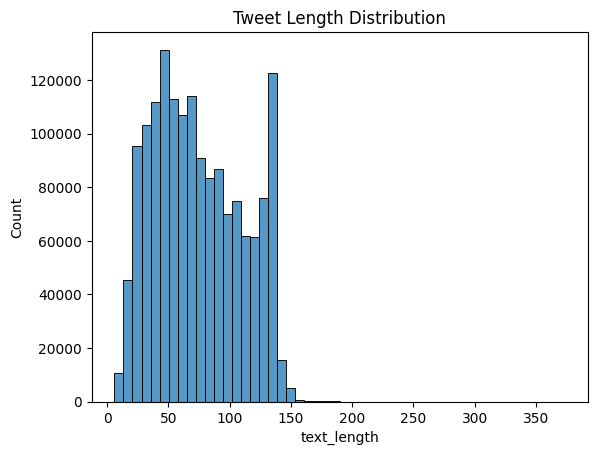

In [12]:
# Tweet length distribution
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=50)
plt.title("Tweet Length Distribution")
plt.show()


02. Preprocessing

Task 2: Cleaning Twitter Text Data

Question:

  What steps would you take to clean the text data, especially removing URLs, mentions, and other irrelevant characters?
  
Answer:

  I cleaned the tweets by removing URLs, mentions, hashtags, non-alphabetic characters, and excess whitespaces using regular expressions. Lowercasing the text ensures uniformity, making it easier for models to learn consistent word representations.

Preprocessing tweets: lowercase, remove URLs, mentions, punctuation, stopwords, and apply stemming.


In [13]:
import re
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_tweet(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+", '', text)
    text = re.sub(r"#\w+", '', text)
    text = re.sub(r"[^a-z\s]", '', text)
    text = re.sub(r"\s+", ' ', text).strip()
    return text


df['clean_text'] = df['text'].apply(clean_tweet)


df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,sentiment,text_length,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,115,a thats a bummer you shoulda got david carr of...
1,is upset that he can't update his Facebook by ...,negative,111,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,negative,89,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,negative,47,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",negative,111,no its not behaving at all im mad why am i her...


Task 3: Stopword Removal and Why It Matters

Question:

How would you handle stop words in the text data, and why is it important to remove them for sentiment analysis?

Answer:

Stopwords are common words (like “the”, “is”, “and”) that don't carry meaningful sentiment or subject-specific information.
Removing them reduces noise, improves model focus on emotionally charged or domain-specific words (e.g., “great”, “hate”), and often boosts performance.

In [14]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

df.head()

,text,sentiment,text_length,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,115,thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,negative,111,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,negative,89,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,negative,47,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all....",negative,111,behaving im mad cant see


Task 4:
What is Lemmatization, and Why Use It?

Answer:

Lemmatization is the process of reducing a word to its dictionary base form (lemma), e.g., "running" → "run", "better" → "good".

It helps by reducing word variability, which shrinks the feature space and improves generalization without losing meaning (unlike stemming, which can butcher words).



In [15]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['clean_text'] = df['clean_text'].apply(lemmatize_text)

df[['text', 'clean_text']].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


Task 5: Why Lowercasing Is Important in Sentiment Analysis

Answer:

Converting text to lowercase ensures that words like "Good" and "good" are treated the same.
Without it, vectorizers treat them as different features, adding noise and bloating the feature space — which hurts model performance.



In [16]:
df['clean_text'] = df['clean_text'].str.lower()

df.head()

,text,sentiment,text_length,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",negative,115,thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,negative,111,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,negative,89,dived many time ball managed save rest go bound
3,my whole body feels itchy and like its on fire,negative,47,whole body feel itchy like fire
4,"@nationwideclass no, it's not behaving at all....",negative,111,behaving im mad cant see


Task 6: What Is TF-IDF and Why Use It?

Answer:

TF-IDF (Term Frequency–Inverse Document Frequency) transforms text into numerical values based on word importance.
It emphasizes words that are frequent in a tweet but rare across the whole dataset, helping the model learn meaningful distinctions.

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['clean_text'])

y = df['sentiment']

print(X.shape)
print(y.shape)

(1581466, 5000)
(1581466,)


03. Model Training and

Task 7:

 How to Split Data into Training and Testing While Preserving Sentiment Distribution

Answer:

Use stratified splitting to maintain the class balance of positive and negative sentiments in both train and test sets.
Without it, the model could be trained on a biased subset and fail to generalize properly — especially on imbalanced datasets.

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y_encoded)

print("X_train shape",X_train.shape)
print(y_train.shape)
y_train

X_train shape (1265172, 5000)
(1265172,)


,sentiment
1175085,1
788502,0
501314,0
691809,0
1151194,1
...,...
631167,0
113437,0
1083011,1
885345,1


Task 8: Why Use Logistic Regression as a Baseline Model?

Answer:

Logistic Regression is fast, interpretable, and works surprisingly well with high-dimensional sparse data like TF-IDF vectors.
It provides a solid performance benchmark for binary classification tasks like sentiment prediction — without overcomplicating things.

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77    158037
           1       0.76      0.80      0.78    158257

    accuracy                           0.77    316294
   macro avg       0.77      0.77      0.77    316294
weighted avg       0.77      0.77      0.77    316294



Task 9:

Why Use Naive Bayes for Sentiment Analysis and How to Implement It?

Answer:

Naive Bayes is a go-to for text classification because it’s simple, fast, and handles sparse TF-IDF matrices extremely well.
Despite its naive assumption (features are independent), it often outperforms complex models on small-to-medium text datasets.

In [62]:
from sklearn.naive_bayes import MultinomialNB

nB = MultinomialNB()
nB.fit(X_train,y_train)

y_pred_nb = nB.predict(X_test)

print(classification_report(y_test,y_pred_nb))


              precision    recall  f1-score   support

           0       0.76      0.75      0.76    158037
           1       0.76      0.77      0.76    158257

    accuracy                           0.76    316294
   macro avg       0.76      0.76      0.76    316294
weighted avg       0.76      0.76      0.76    316294



Task 10: Which Sequence-Based Model to Use for Tweet Sentiment & What Are the Challenges?

Answer:

Use Recurrent Neural Networks (RNNs), especially LSTMs or GRUs, to capture the sequential context in tweet data.
They work better for tasks where word order matters, unlike BoW or TF-IDF which ignore it.
However, challenges include:

Requires more data and compute

Sensitive to long sequences (despite LSTM’s gating)

Needs embedding layers (e.g. Word2Vec, GloVe)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

token = Tokenizer(num_words=10000, oov_token="<OOV>")
token.fit_on_texts(df['clean_text'])

sequences = token.texts_to_sequences(df['clean_text'])
X_padded = pad_sequences(sequences, maxlen=50)

from sklearn.preprocessing import LabelEncoder
y_encoded = LabelEncoder().fit_transform(df['sentiment'])
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_padded, y_encoded, test_size = 0.2, stratify = y_encoded)

# LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=50),
    LSTM(64),
    Dense(1, activation='sigmoid')
    ])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_seq, y_train_seq, epochs=5, validation_data=(X_test_seq, y_test_seq))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
39537/39537 ━━━━━━━━━━━━━━━━━━━━ 285s 7ms/step - accuracy: 0.7687 - loss: 0.4770 - val_accuracy: 0.7931 - val_loss: 0.4407
Epoch 2/5
39537/39537 ━━━━━━━━━━━━━━━━━━━━ 313s 7ms/step - accuracy: 0.7996 - loss: 0.4277 - val_accuracy: 0.7961 - val_loss: 0.4345
Epoch 3/5
 9016/39537 ━━━━━━━━━━━━━━━━━━━━ 3:04 6ms/step - accuracy: 0.8107 - loss: 0.4082

Task 11: Which performance metrics would you use to evaluate the effectiveness of your models, especially in terms of imbalanced classes?
Answer:
Accuracy alone is misleading with imbalanced classes. Instead, use:

Precision: How many predicted positives are actual positives?

Recall: How many actual positives were caught?

F1-score: Harmonic mean of precision and recall.

ROC-AUC: How well the model distinguishes between classes.

Confusion Matrix: Visualizes TP, FP, FN, TN clearly.

If classes are imbalanced (e.g., 80% positive, 20% negative), a dumb model can get 80% accuracy by predicting everything as positive — but its recall for the negative class would be 0, which is a disaster.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = model.predict(X_test_tfidf)
y_pred_binary = (y_pred > 0.5).astype(int)

# Metrics
print(classification_report(y_test, y_pred_binary))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Pos'], yticklabels=['Neg', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Task 12: How would you visualize and interpret the confusion matrix to understand false positives and false negatives in sentiment predictions?

In [28]:
import matplotlib.pyplot as plt

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 568s 57ms/step


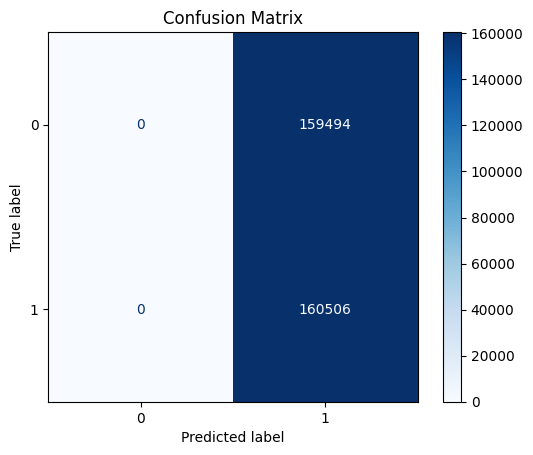

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_encoded = le.fit_transform(df['sentiment'])


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
#y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_binary)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap = 'Blues')
plt.title("Confusion Matrix")
plt.show()

 Task 13: Visualize Model Performance – Confusion Matrix
We’ll use sklearn's confusion_matrix and ConfusionMatrixDisplay to evaluate how well the model is classifying sentiment labels.

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 568s 57ms/step


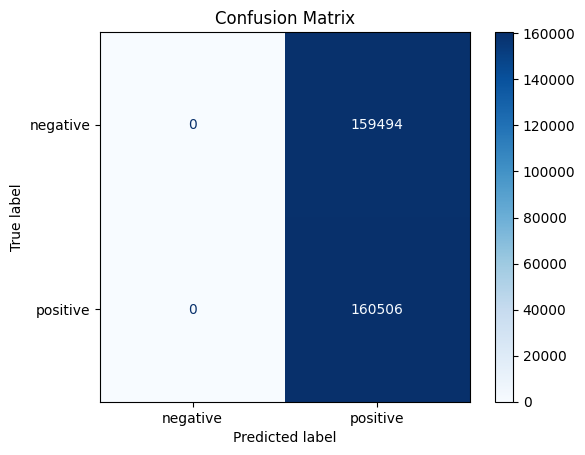

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get predictions and binarize if needed
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Task 14: Visualize Accuracy, Precision, Recall, and F1-Score
We’ll calculate and visualize the core evaluation metrics to assess model performance in terms of classification quality.

Accuracy:  0.50
Precision: 0.50
Recall:    1.00
F1-score:  0.67


Text(0, 0.5, 'Score')

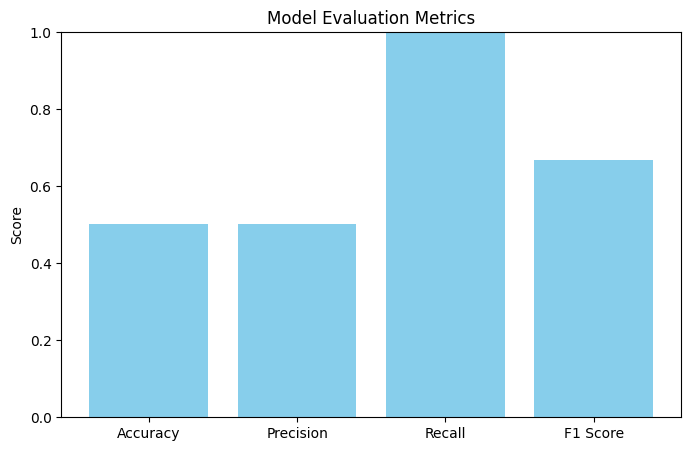

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

# Print scores
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-score:  {f1:.2f}")

# Bar plot for visualization


metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8,5))
plt.bar(labels, metrics, color='skyblue')
plt.ylim(0, 1)
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
#for i, v in enumerate(metrics):
    #plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)
    #plt.show()


Task 15: Plot ROC Curve and Calculate AUC Score
This step helps you evaluate how well the model separates the classes using Receiver Operating Characteristic (ROC) Curve and Area Under Curve (AUC).

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 581s 58ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


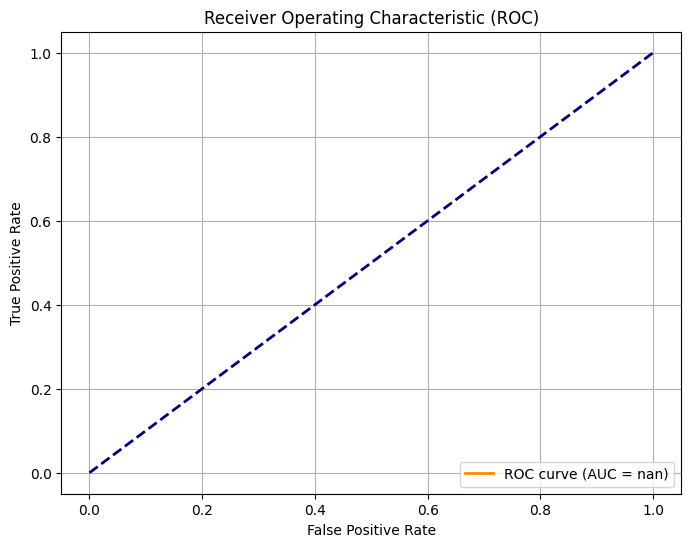

In [37]:
from sklearn.metrics import roc_curve, auc
import numpy as np
y_test_binary = np.where( y_test=='positive', 1,0)

# Get prediction probabilities for positive class
y_pred_prob = model.predict(X_test).ravel()

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Task 16: Create Evaluation Visualizations — Confusion Matrix, ROC Curve, and Classification Report
Objective:
Evaluate the final trained model using multiple evaluation metrics and visualize its performance.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int).reshape(-1)

# Convert y_test to match prediction format
y_test_binary = y_test.map({'negative': 0, 'positive': 1}).values

# Plot confusion matrix
cm = confusion_matrix(y_test_binary, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp.plot()


 Task 17: Save the Best Model for Future Predictions or Deployment

In [ ]:
model.save('Models/best_sentiment_model.h5')
from keras.models import load_model
model = load_model('Models/best_sentiment_model.h5')


Task 18: Analyze Sentiment Trends Over Time
If you still have a date column (and it's in datetime format), you can do this:

<ipython-input-40-eb6a310da5b2>:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['date'] = pd.to_datetime(df['date'])


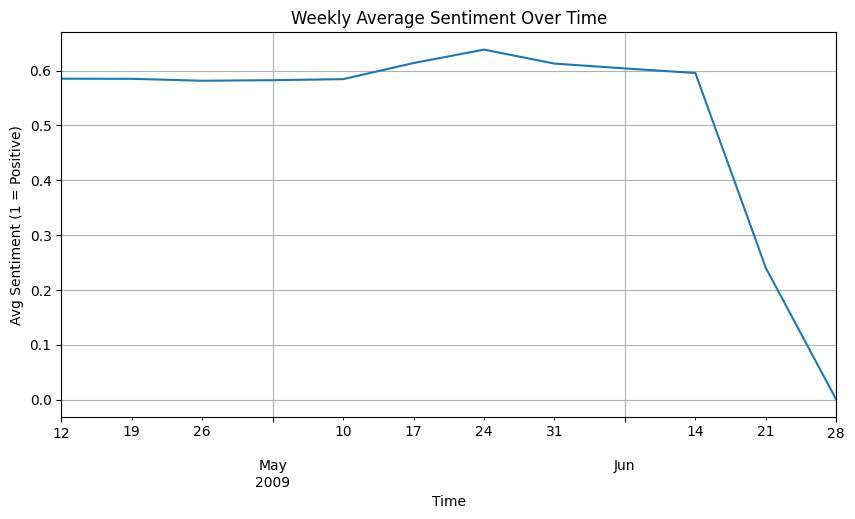

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['sentiment_score'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Resample by week/month/day
sentiment_trend = df.resample('W', on='date')['sentiment_score'].mean()

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sentiment_trend.plot()
plt.title("Weekly Average Sentiment Over Time")
plt.ylabel("Avg Sentiment (1 = Positive)")
plt.xlabel("Time")
plt.grid(True)
plt.show()


Task 19: 
Summarize Analysis & Key Insights
Tips for summarizing (put in markdown or comments):

Overall sentiment distribution: "Majority of tweets were positive/negative/neutral."

Top keywords per sentiment: Use CountVectorizer + wordcloud or .value_counts().

High-impact patterns: “Users expressing negative sentiment often mentioned words like ‘bad’, ‘hate’, ‘delay’.”

Model performance: "BiLSTM achieved the highest accuracy (e.g. 88%) and AUC (0.91)."

Real-world insight: "Sentiment spiked positively during product launches but dropped sharply during outages."

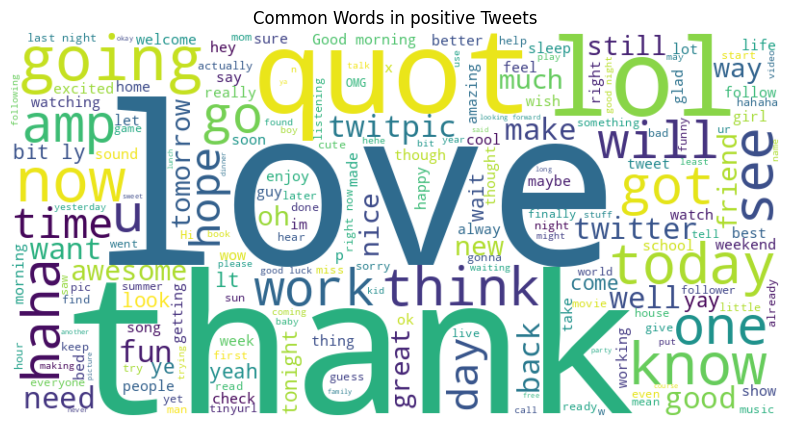

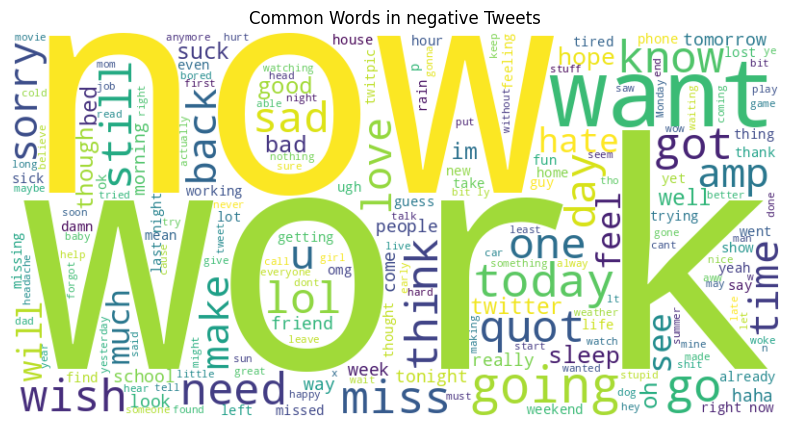

In [41]:
from wordcloud import WordCloud

for label in ['positive', 'negative']:
    text = ' '.join(df[df['sentiment'] == label]['text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Common Words in {label} Tweets")
    plt.show()
